<a href="https://colab.research.google.com/github/annagillard/GitHub-Practice-184/blob/main/Parent_Paper_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data =pd.read_csv("drive/My Drive/DS 340W Project/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transaction: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transaction: 284315


In [ ]:
X = data.drop(['Class'], axis=1)
Y = data['Class']
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=0.2, random_state=42)

In [ ]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used in Random Forest Classifier")

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))


The model used in Random Forest Classifier
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635


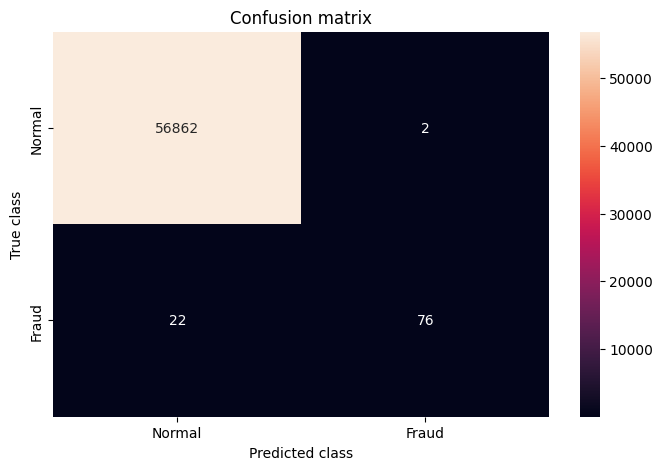

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
models = [rfc, LogisticRegression(), GaussianNB(), MLPClassifier(hidden_layer_sizes=(6,5),random_state=5, verbose=True, learning_rate_init=0.01)]

for i in range(4):
    models[i] = models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict(X_test)))
    print()

RandomForestClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.8826354754056941

LogisticRegression() : 
Training Accuracy :  0.7727766913237318
Validation Accuracy :  0.7499208638154192

GaussianNB() : 
Training Accuracy :  0.9056040005671329
Validation Accuracy :  0.8972160931057848

Iteration 1, loss = 0.18070903
Iteration 2, loss = 0.02163258
Iteration 3, loss = 0.01457153
Iteration 4, loss = 0.01310464
Iteration 5, loss = 0.01277578
Iteration 6, loss = 0.01273252
Iteration 7, loss = 0.01272917
Iteration 8, loss = 0.01273260
Iteration 9, loss = 0.01273584
Iteration 10, loss = 0.01273472
Iteration 11, loss = 0.01273450
Iteration 12, loss = 0.01273770
Iteration 13, loss = 0.01273378
Iteration 14, loss = 0.01273569
Iteration 15, loss = 0.01273372
Iteration 16, loss = 0.01272461
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=T

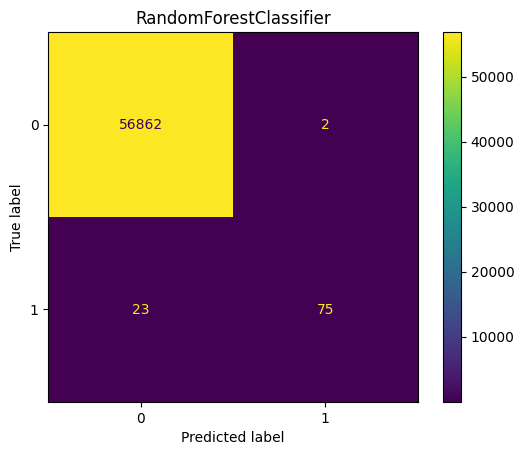

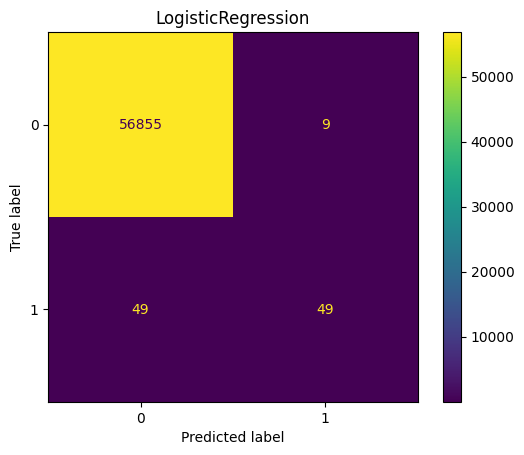

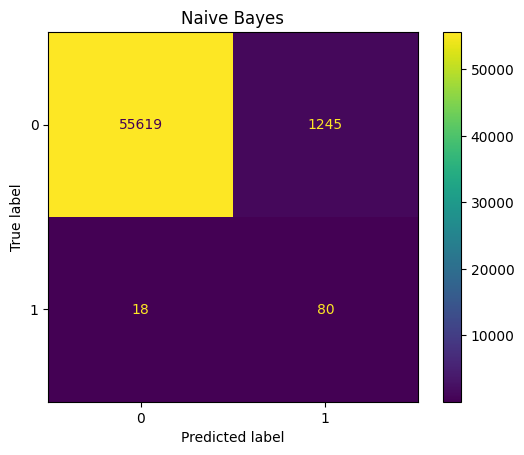

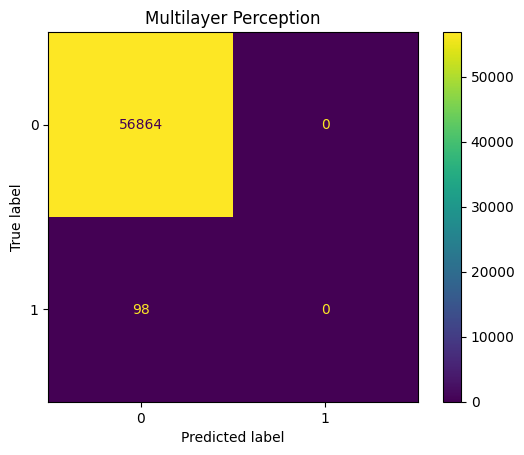

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

model_names = ['RandomForestClassifier', 'LogisticRegression', 'Naive Bayes', 'Multilayer Perception']
for i in range(4):
    ConfusionMatrixDisplay.from_estimator(models[i], X_test, y_test)
    plt.title(model_names[i])
    plt.show()


In [ ]:
model_names = ['RandomForestClassifier', 'LogisticRegression', 'Naive Bayes', 'Multilayer Perception']
#models = [rfc, LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
for i in range(4):
    print('------', model_names[i], '------')
    print(metrics.classification_report(y_test, models[i].predict(X_test)))

------ RandomForestClassifier ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

------ LogisticRegression ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.50      0.63        98

    accuracy                           1.00     56962
   macro avg       0.92      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962

------ Naive Bayes ------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
